{'rnl': '#8000ff', 'nad4': '#770dff', 'orf450': '#cccccc', 'trnI': '#6727fe', 'trnM': '#5f33fe', 'trnS': '#5640fd', 'cox3': '#4e4cfc', 'cox1': '#4659fb', 'trnE': '#3e65fa', 'trnG': '#3570f8', 'cox2': '#2d7cf7', 'nad6': '#2587f5', 'trnV': '#1d92f3', 'nad4L': '#159cf1', 'rpl14': '#0ca6ef', 'orf169': '#cccccc', 'orf178': '#cccccc', 'rps12': '#0cc1e8', 'nad7': '#15cae5', 'nad5': '#1dd1e2', 'rps13': '#25d8df', 'rpl2': '#2ddfdc', 'rps19': '#35e5d8', 'rps3': '#3eead5', 'rpl16': '#46efd1', 'orf1103': '#cccccc', 'rps10': '#56f7ca', 'trnP': '#5ffac6', 'trnN': '#67fcc1', 'trnR': '#6ffebd', 'trnY': '#77ffb9', 'trnF': '#80ffb4', 'nad9': '#88ffb0', 'nad2': '#90feab', 'trnC': '#98fca6', 'trnA': '#a0faa1', 'rps14': '#a9f79c', 'rps8': '#b1f397', 'rpl6': '#b9ef92', 'rps2': '#c1ea8c', 'rps4': '#cae587', 'atp9': '#d2df81', 'trnW': '#dad87c', 'nad3': '#e2d176', 'trnK': '#eaca70', 'trnD': '#f3c16a', 'trnH': '#fbb965', 'atp8': '#ffb05f', 'atp1': '#ffa659', 'atp6': '#ff9c52', 'trnQ': '#ff924c', 'rns': '#ff874

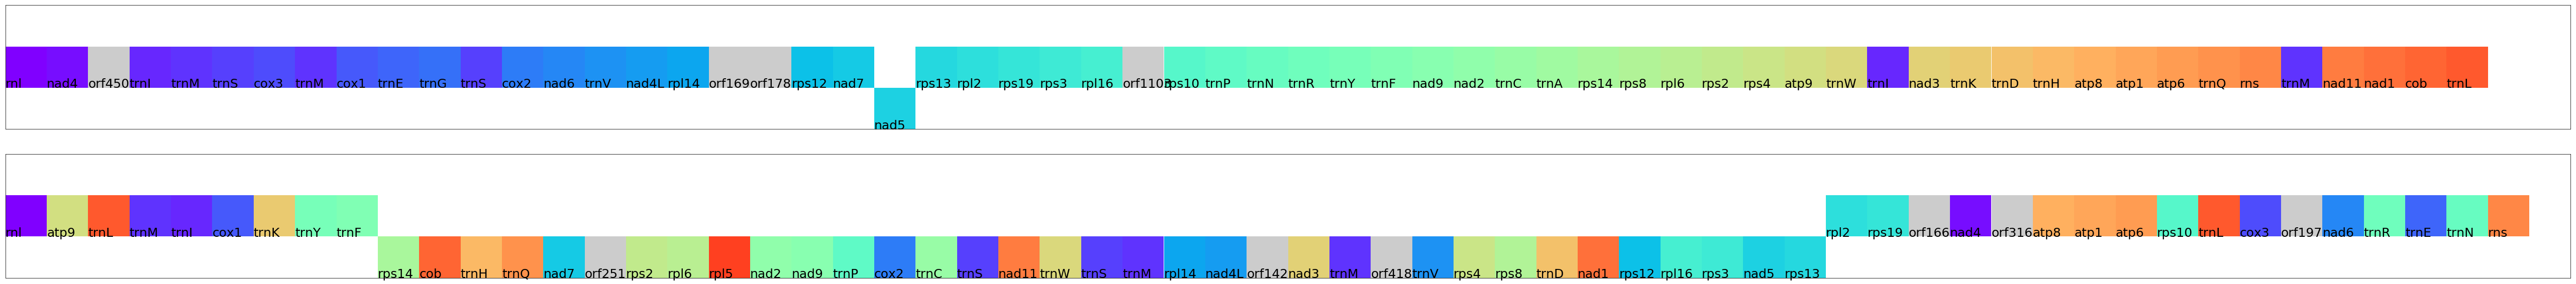

In [99]:
import csv
import matplotlib.pyplot as plt
import matplotlib
import math

#################
### FUNCTIONS ###
#################

def get_cmap(n, name='rainbow'): #hsv for very divergent data?
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    colormap = plt.cm.get_cmap(name, n)
    rgbcolors = []
    for i in range(colormap.N):
        rgb = colormap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        rgbcolors.append(matplotlib.colors.rgb2hex(rgb))
    return rgbcolors

geneorder1 = csv.reader(open("cafe_table.tsv"), delimiter="\t", skipinitialspace=True)
geneorder2 = csv.reader(open("cafi_table.tsv"), delimiter="\t", skipinitialspace=True)

##################
###    MAIN    ###
##################
#create a dictionary of taxon data and a list of all localities
genedata1 = {}
genes = list()
cafeteria_order = []
for i,row in enumerate(geneorder1):
    gene = row[1].split("(")[0]
    genedata1[i] = {"Gene": gene, "Direction": row[-1]}
    if gene not in genes:
        genes.append(gene)
    cafeteria_order.append(gene)

genedata2 = {}
picurka_order = []
for i,row in enumerate(geneorder2):
    gene = row[1].split("(")[0]
    genedata2[i] = {"Gene": gene, "Direction": row[-1]}
    if gene not in genes:
        genes.append(gene)
    picurka_order.append(gene)

#assign colors to localities
N = len(genes)
cmap = get_cmap(N)
colors = {}
for i, X in enumerate(genes):
    if X.startswith("orf"):
        colors[X] = '#cccccc' #these will be gray
    else:
        colors[X] = cmap[i] #this is a color in hexa
print(colors)

#generate a coloured gene order scheme
maxlen = max(len(cafeteria_order), len(picurka_order))

plt.rcParams['font.size'] = 25
fig=plt.figure(figsize=(1.5*maxlen, 10), frameon=False)

ax=fig.add_subplot(211)
#plt.axis('scaled')
#ax.set_ylabel("Cafeteria roenbergensis")
ax.set_xlim([ 0, maxlen + 1])
ax.set_ylim([-1.5, 1.5])


for k,g in enumerate(cafeteria_order):
    if genedata1[k]["Direction"] == "forward":
        rect = plt.Rectangle((k, -0.5), 1, 1, facecolor=colors[genedata1[k]["Gene"]])
        plt.annotate(genedata1[k]["Gene"], xy=(k, -0.5)) #doesnt give a f about font size
        ax.add_artist(rect)
    elif genedata1[k]["Direction"] == "reverse":
        rect = plt.Rectangle((k, -1.5), 1, 1, facecolor=colors[genedata1[k]["Gene"]])
        plt.annotate(genedata1[k]["Gene"], xy=(k, -1.5))
        ax.add_artist(rect)
    else:
        print("invalid direction", genedata1[k]["Gene"], genedata1[k]["Direction"])

ax.set_yticks([])
ax.set_xticks([])

ax1=fig.add_subplot(212)
#plt.axis('scaled')
#ax1.set_ylabel("Cafileria marina")
ax1.set_xlim([ 0, maxlen + 1])
ax1.set_ylim([-1.5, 1.5])

for k,g in enumerate(picurka_order):
    if genedata2[k]["Direction"] == "forward":
        rect = plt.Rectangle((k, -0.5), 1, 1, facecolor=colors[genedata2[k]["Gene"]])
        plt.annotate(genedata2[k]["Gene"], xy=(k, -0.5))
        ax1.add_artist(rect)
    elif genedata2[k]["Direction"] == "reverse":
        rect = plt.Rectangle((k, -1.5), 1, 1, facecolor=colors[genedata2[k]["Gene"]])
        plt.annotate(genedata2[k]["Gene"], xy=(k, -1.5))
        ax1.add_artist(rect)
    else:
        print("invalid direction", genedata2[k]["Gene"], genedata2[k]["Direction"])
        
ax1.set_yticks([])
ax1.set_xticks([])
#plt.axes().set_xticklabels(picurka_order)

#plt.savefig('colin_scheme.pdf')
plt.show()